# Tile Area

Timothy Helton

2018-10-31

## Background

Given a rectangle return indices of tiles of a prescribed size.
- If the final row of tiles exceeds the bounds to the rectangle then
the tile will be clipped at the boundary.

## Imports

In [1]:
from typing import Tuple, Union

from matplotlib.lines import Line2D
import matplotlib.patches as patches
from matplotlib.path import Path
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import spatial

## Format Notebook

In [2]:
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Functions

In [3]:
def draw_rectangle(array: np.array, tile_points: Union[np.array, None]=None,
                   tile_offset: Union[np.array, None]=None):
    """Draw rectangle given two corners."""
    def draw_points(pts: np.array, marker: str='o', color: str='b'):
        for n, p in enumerate(pts):
            ax.scatter(p[:, 0], p[:, 1], marker=marker, c=color)
            
    fig = plt.figure('Age Time Plot', figsize=(5, 5),                          
                     facecolor='white', edgecolor='black')                      
    rows, cols = 1, 1                                                           
    ax = plt.subplot2grid((rows, cols), (0, 0))

    patch = patches.PathPatch(path_rectangle(array), alpha=0.3, lw=1)
    ax.add_patch(patch)
    
    if tile_points is not None:
        draw_points(tile_points)
    if tile_offset is not None:
        draw_points(tile_offset, '^', 'r')
    
    legend_elems = [
        patches.Patch(alpha=0.3, edgecolor='k', label='Rectangle'),
        Line2D([0], [0], color='k', linestyle='None', marker='o',
              label='Tile Vertices', ),
        Line2D([0], [0], color='r', linestyle='None', marker='^',
              label='Offset Tile Vertices', ),
    ]
    ax.legend(bbox_to_anchor=(1.5, 1), frameon=False, handles=legend_elems,
              loc='upper right')
    ax.axis('equal')
    sns.despine(top=True, right=True)
    plt.show()

In [4]:
def path_rectangle(array: np.array):
    """Define rectangle path from (min_x, min_y, max_x, max_y)."""
    c_min, r_min, c_max, r_max = array.flatten()
    verts = [
       (c_min, r_min),
       (c_min, r_max),
       (c_max, r_max),
       (c_max, r_min),
       (c_min, r_min),
    ]
    codes = [
        Path.MOVETO,
        Path.LINETO,
        Path.LINETO,
        Path.LINETO,
        Path.CLOSEPOLY,
    ]
    return Path(verts, codes)

In [5]:
def tile(rectangle: np.array, tile_size: Tuple[int]):
    """Create tile coordinates."""
    c_tile, r_tile = tile_size
    c_min, r_min, c_max, r_max = rectangle.flatten()
    cols = c_max - c_min
    rows = r_max - r_min
    
    col_span = np.arange(c_min, c_max + c_tile, c_tile)
    row_span = np.arange(r_min, r_max + r_tile, r_tile)
    col_span = tile_boundary(col_span, c_max)
    row_span = tile_boundary(row_span, r_max)
    
    col_pts, row_pts = np.meshgrid(col_span, row_span, sparse=True)

    pts = np.empty((col_pts.size, row_pts.size, 2))
    for n, col in enumerate(col_pts.flatten()):
        pts[n] = np.insert(row_pts, 0, values=col, axis=1)
    
    return pts

In [6]:
def tile_boundary(array: np.array, a_max: int) -> np.array:
    """Define boundary vertices."""
    if array[-1] >= a_max:
        array[-1] = a_max
        return array
    else:
        return array[:-1]

In [7]:
def tile_offset(rectangle: np.array, offset: int,
                tile_size: np.array) -> np.array:
    """Offset tile points to create overlapping tiles."""
    c_tile, r_tile = tile_size
    rec = rectangle.copy()
    rec[0] += offset
    return tile(rec, tile_size)

# Create Rectangle

## Rectangle evenly divisible by 2

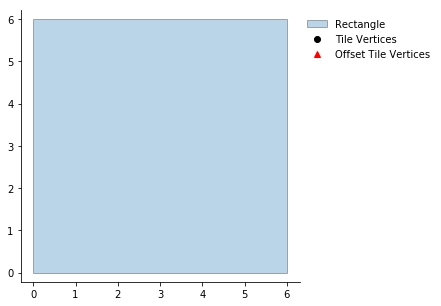

In [8]:
even_rec = np.array([(0, 0), (6, 6)])
draw_rectangle(even_rec)

## Rectangle not evenly divisible by 3

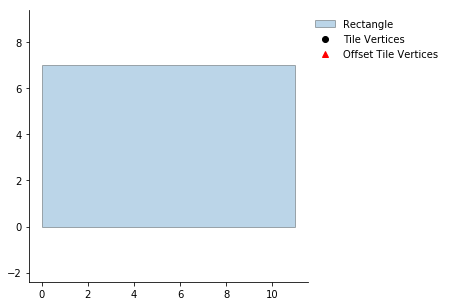

In [9]:
odd_rec = np.array([(0, 0), (11, 7)])
draw_rectangle(odd_rec)

# Tile Rectangle

## Even Rectangle

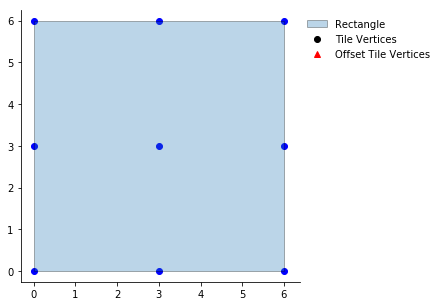

In [10]:
vertices = tile(even_rec, (3, 3))
draw_rectangle(even_rec, vertices)

## Odd Rectangle

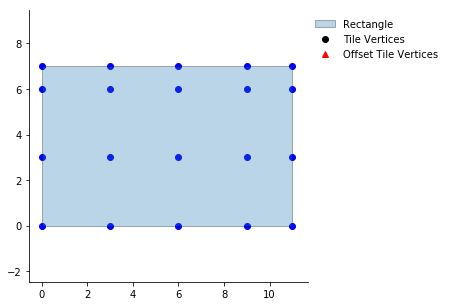

In [11]:
vertices = tile(odd_rec, (3, 3))
draw_rectangle(odd_rec, vertices)

## Offset

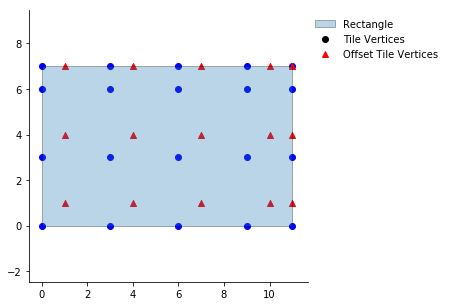

In [12]:
patch_size = (3, 3)
vertices = tile(odd_rec, patch_size)
offset = tile_offset(odd_rec, 1, patch_size)
draw_rectangle(odd_rec, vertices, offset)